In [1]:
from keras.datasets import mnist 
mnist.load_data()
print("Data loaded")

2022-11-30 04:26:03.000251: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Data loaded


In [2]:
# imports for array-handling and plotting
import numpy as np
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import time
# let's keep our keras backend tensorflow quiet
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
# for testing on CPU
#os.environ['CUDA_VISIBLE_DEVICES'] = ''

# keras imports for the dataset and building our neural network
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

In [3]:
start_main = time.time()

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

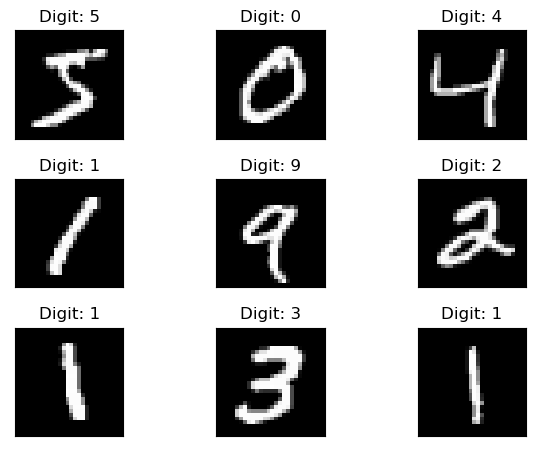

In [5]:
fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])
fig
plt.savefig('szamok')

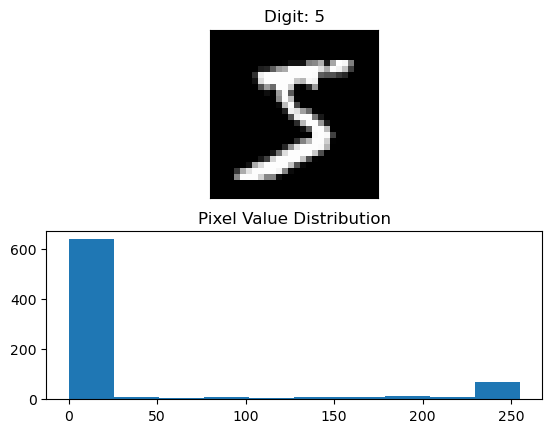

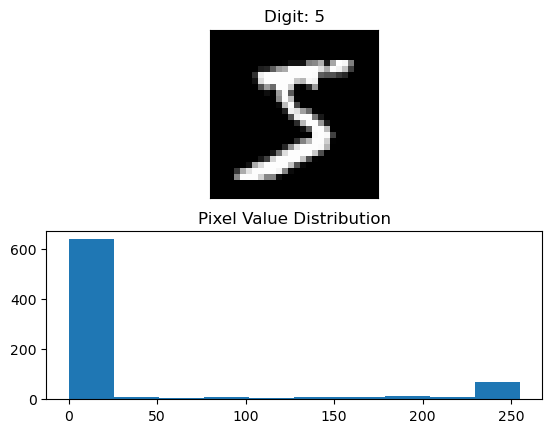

In [6]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(X_train[0], cmap='gray', interpolation='none')
plt.title("Digit: {}".format(y_train[0]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(X_train[0].reshape(784))
plt.title("Pixel Value Distribution")
fig
#plt.savefig('plot')

In [7]:
# let's print the shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# building the input vector from the 28x28 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [8]:
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


In [9]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [10]:
# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

In [11]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [12]:
# training the model and saving metrics in history
start = time.time()
history1 = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))
end = time.time()
time1=end-start
# saving the model
save_dir = 'results'
model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Epoch 1/20
469/469 - 11s - loss: 0.2491 - accuracy: 0.9248 - val_loss: 0.1080 - val_accuracy: 0.9681 - 11s/epoch - 23ms/step
Epoch 2/20
469/469 - 9s - loss: 0.1007 - accuracy: 0.9689 - val_loss: 0.0929 - val_accuracy: 0.9714 - 9s/epoch - 19ms/step
Epoch 3/20
469/469 - 9s - loss: 0.0719 - accuracy: 0.9770 - val_loss: 0.0700 - val_accuracy: 0.9789 - 9s/epoch - 19ms/step
Epoch 4/20
469/469 - 8s - loss: 0.0569 - accuracy: 0.9816 - val_loss: 0.0681 - val_accuracy: 0.9802 - 8s/epoch - 17ms/step
Epoch 5/20
469/469 - 7s - loss: 0.0455 - accuracy: 0.9851 - val_loss: 0.0668 - val_accuracy: 0.9808 - 7s/epoch - 16ms/step
Epoch 6/20
469/469 - 9s - loss: 0.0381 - accuracy: 0.9877 - val_loss: 0.0733 - val_accuracy: 0.9803 - 9s/epoch - 18ms/step
Epoch 7/20
469/469 - 7s - loss: 0.0338 - accuracy: 0.9890 - val_loss: 0.0605 - val_accuracy: 0.9815 - 7s/epoch - 16ms/step
Epoch 8/20
469/469 - 8s - loss: 0.0318 - accuracy: 0.9901 - val_loss: 0.0719 - val_accuracy: 0.9795 - 8s/epoch - 17ms/step
Epoch 9/20
469

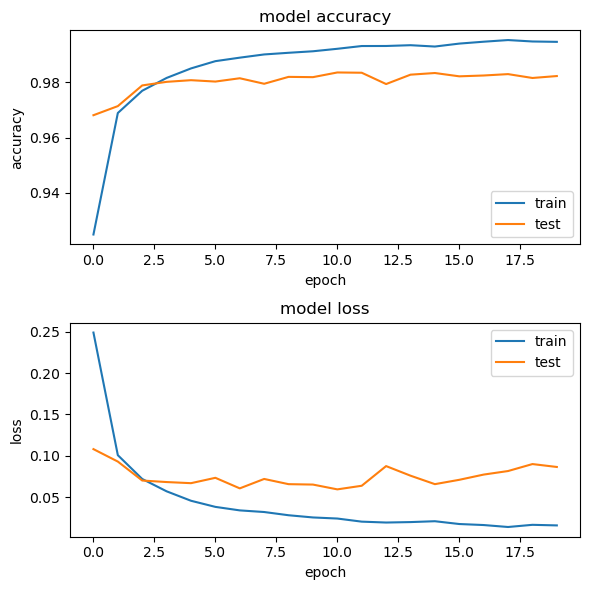

In [13]:
fig = plt.figure(figsize=(6,6))
plt.subplot(2,1,1)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [14]:
mnist_model = load_model(model_path)
loss_and_metrics1 = mnist_model.evaluate(X_test, Y_test, verbose=2)

313/313 - 1s - loss: 0.0864 - accuracy: 0.9823 - 925ms/epoch - 3ms/step


In [15]:
# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.4))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(10))
model.add(Activation('softmax'))

In [16]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [17]:
# training the model and saving metrics in history
start = time.time()
history2 = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))
end = time.time()
time2=end-start
# saving the model
save_dir = 'results'
model_name = 'drop04_keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Epoch 1/20
469/469 - 9s - loss: 0.3035 - accuracy: 0.9080 - val_loss: 0.1085 - val_accuracy: 0.9662 - 9s/epoch - 19ms/step
Epoch 2/20
469/469 - 7s - loss: 0.1361 - accuracy: 0.9582 - val_loss: 0.0869 - val_accuracy: 0.9738 - 7s/epoch - 16ms/step
Epoch 3/20
469/469 - 8s - loss: 0.1013 - accuracy: 0.9680 - val_loss: 0.0756 - val_accuracy: 0.9756 - 8s/epoch - 16ms/step
Epoch 4/20
469/469 - 7s - loss: 0.0850 - accuracy: 0.9735 - val_loss: 0.0720 - val_accuracy: 0.9784 - 7s/epoch - 16ms/step
Epoch 5/20
469/469 - 8s - loss: 0.0722 - accuracy: 0.9770 - val_loss: 0.0639 - val_accuracy: 0.9808 - 8s/epoch - 17ms/step
Epoch 6/20
469/469 - 7s - loss: 0.0661 - accuracy: 0.9793 - val_loss: 0.0637 - val_accuracy: 0.9809 - 7s/epoch - 16ms/step
Epoch 7/20
469/469 - 8s - loss: 0.0614 - accuracy: 0.9803 - val_loss: 0.0638 - val_accuracy: 0.9811 - 8s/epoch - 17ms/step
Epoch 8/20
469/469 - 7s - loss: 0.0542 - accuracy: 0.9827 - val_loss: 0.0589 - val_accuracy: 0.9834 - 7s/epoch - 16ms/step
Epoch 9/20
469/4

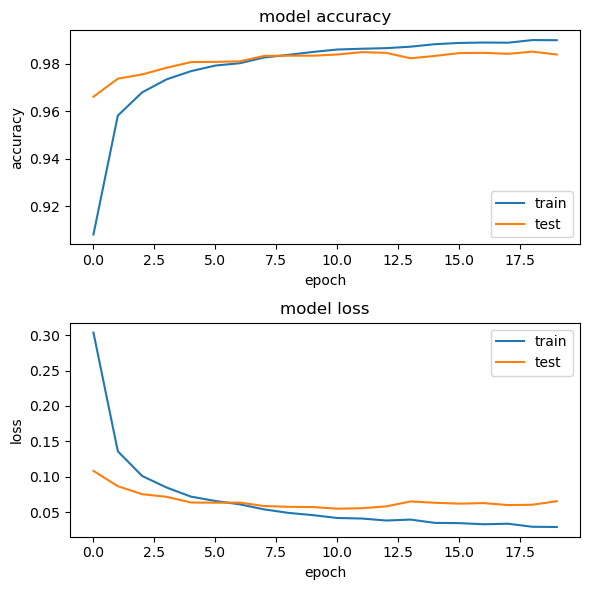

In [18]:
fig = plt.figure(figsize=(6,6))
plt.subplot(2,1,1)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [19]:
mnist_model = load_model(model_path)
loss_and_metrics2 = mnist_model.evaluate(X_test, Y_test, verbose=2)

313/313 - 1s - loss: 0.0658 - accuracy: 0.9840 - 919ms/epoch - 3ms/step


In [20]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

In [21]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [22]:
# training the model and saving metrics in history
start = time.time()
history3 = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))
end = time.time()
time3=end-start
# saving the model
save_dir = 'results'
model_name = 'twomorelayer_keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Epoch 1/20
469/469 - 17s - loss: 0.2717 - accuracy: 0.9174 - val_loss: 0.1062 - val_accuracy: 0.9689 - 17s/epoch - 36ms/step
Epoch 2/20
469/469 - 14s - loss: 0.1169 - accuracy: 0.9653 - val_loss: 0.0993 - val_accuracy: 0.9702 - 14s/epoch - 30ms/step
Epoch 3/20
469/469 - 15s - loss: 0.0900 - accuracy: 0.9733 - val_loss: 0.0832 - val_accuracy: 0.9749 - 15s/epoch - 31ms/step
Epoch 4/20
469/469 - 15s - loss: 0.0744 - accuracy: 0.9776 - val_loss: 0.0740 - val_accuracy: 0.9797 - 15s/epoch - 32ms/step
Epoch 5/20
469/469 - 14s - loss: 0.0610 - accuracy: 0.9815 - val_loss: 0.0717 - val_accuracy: 0.9806 - 14s/epoch - 31ms/step
Epoch 6/20
469/469 - 15s - loss: 0.0548 - accuracy: 0.9836 - val_loss: 0.0701 - val_accuracy: 0.9800 - 15s/epoch - 31ms/step
Epoch 7/20
469/469 - 14s - loss: 0.0471 - accuracy: 0.9857 - val_loss: 0.0731 - val_accuracy: 0.9797 - 14s/epoch - 30ms/step
Epoch 8/20
469/469 - 16s - loss: 0.0459 - accuracy: 0.9861 - val_loss: 0.0741 - val_accuracy: 0.9796 - 16s/epoch - 35ms/step


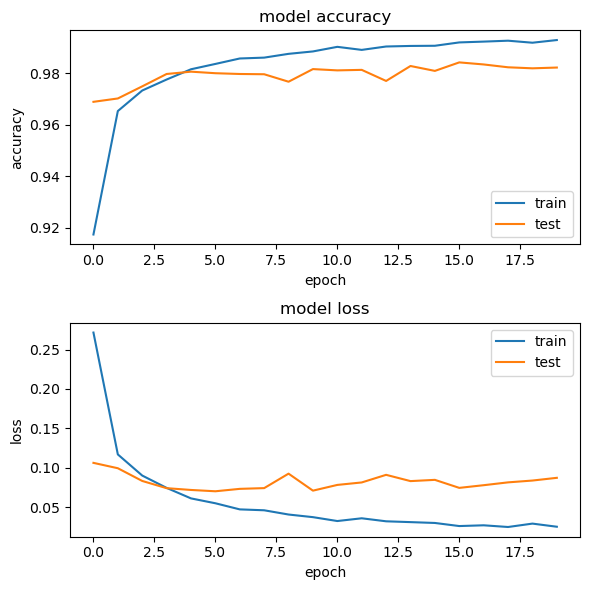

In [23]:
fig = plt.figure(figsize=(6,6))
plt.subplot(2,1,1)
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [24]:
mnist_model = load_model(model_path)
loss_and_metrics3 = mnist_model.evaluate(X_test, Y_test, verbose=2)

313/313 - 1s - loss: 0.0872 - accuracy: 0.9822 - 1s/epoch - 4ms/step


In [25]:
start = time.time()
history4 = model.fit(X_train, Y_train,
          batch_size=128, epochs=40, #mert szeretem ha fő az i5 
          verbose=2,
          validation_data=(X_test, Y_test))
end = time.time()
time4= end -start
# saving the model
save_dir = 'results'
model_name = 'epoch40_keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Epoch 1/40
469/469 - 17s - loss: 0.0238 - accuracy: 0.9934 - val_loss: 0.0818 - val_accuracy: 0.9812 - 17s/epoch - 35ms/step
Epoch 2/40
469/469 - 16s - loss: 0.0206 - accuracy: 0.9938 - val_loss: 0.0776 - val_accuracy: 0.9834 - 16s/epoch - 33ms/step
Epoch 3/40
469/469 - 16s - loss: 0.0211 - accuracy: 0.9940 - val_loss: 0.0901 - val_accuracy: 0.9860 - 16s/epoch - 33ms/step
Epoch 4/40
469/469 - 15s - loss: 0.0202 - accuracy: 0.9943 - val_loss: 0.0862 - val_accuracy: 0.9832 - 15s/epoch - 31ms/step
Epoch 5/40
469/469 - 14s - loss: 0.0220 - accuracy: 0.9935 - val_loss: 0.0930 - val_accuracy: 0.9837 - 14s/epoch - 30ms/step
Epoch 6/40
469/469 - 14s - loss: 0.0185 - accuracy: 0.9944 - val_loss: 0.0880 - val_accuracy: 0.9837 - 14s/epoch - 31ms/step
Epoch 7/40
469/469 - 15s - loss: 0.0206 - accuracy: 0.9945 - val_loss: 0.0865 - val_accuracy: 0.9828 - 15s/epoch - 31ms/step
Epoch 8/40
469/469 - 17s - loss: 0.0186 - accuracy: 0.9951 - val_loss: 0.0999 - val_accuracy: 0.9819 - 17s/epoch - 35ms/step


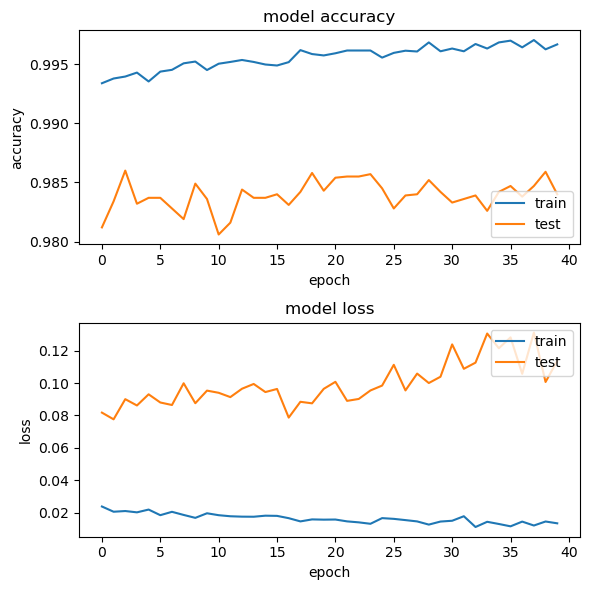

In [26]:
fig = plt.figure(figsize=(6,6))
plt.subplot(2,1,1)
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [27]:
mnist_model = load_model(model_path)
loss_and_metrics4 = mnist_model.evaluate(X_test, Y_test, verbose=2)


313/313 - 1s - loss: 0.1136 - accuracy: 0.9840 - 1s/epoch - 5ms/step


In [28]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

In [29]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [30]:
start = time.time()
print("time_start")
history5 = model.fit(X_train, Y_train,
          batch_size=512, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))
end = time.time()
time5=end - start
# saving the model
save_dir = 'results'
model_name = 'batch512_keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

time_start
Epoch 1/20
118/118 - 10s - loss: 0.3980 - accuracy: 0.8780 - val_loss: 0.1261 - val_accuracy: 0.9604 - 10s/epoch - 82ms/step
Epoch 2/20
118/118 - 9s - loss: 0.1278 - accuracy: 0.9610 - val_loss: 0.0858 - val_accuracy: 0.9723 - 9s/epoch - 75ms/step
Epoch 3/20
118/118 - 8s - loss: 0.0919 - accuracy: 0.9715 - val_loss: 0.0793 - val_accuracy: 0.9741 - 8s/epoch - 69ms/step
Epoch 4/20
118/118 - 7s - loss: 0.0729 - accuracy: 0.9770 - val_loss: 0.0692 - val_accuracy: 0.9782 - 7s/epoch - 62ms/step
Epoch 5/20
118/118 - 8s - loss: 0.0601 - accuracy: 0.9811 - val_loss: 0.0689 - val_accuracy: 0.9798 - 8s/epoch - 70ms/step
Epoch 6/20
118/118 - 8s - loss: 0.0465 - accuracy: 0.9851 - val_loss: 0.0676 - val_accuracy: 0.9804 - 8s/epoch - 67ms/step
Epoch 7/20
118/118 - 8s - loss: 0.0438 - accuracy: 0.9859 - val_loss: 0.0729 - val_accuracy: 0.9801 - 8s/epoch - 68ms/step
Epoch 8/20
118/118 - 8s - loss: 0.0360 - accuracy: 0.9885 - val_loss: 0.0597 - val_accuracy: 0.9830 - 8s/epoch - 64ms/step
Epo

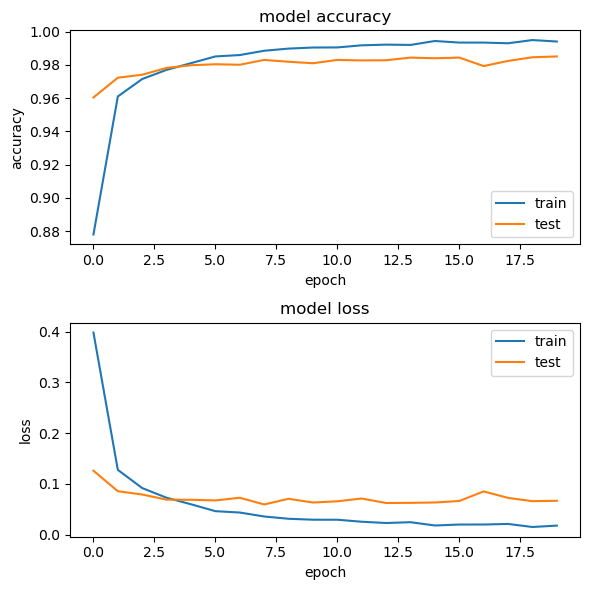

In [31]:
fig = plt.figure(figsize=(6,6))
plt.subplot(2,1,1)
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [32]:
mnist_model = load_model(model_path)
loss_and_metrics5 = mnist_model.evaluate(X_test, Y_test, verbose=2)


313/313 - 1s - loss: 0.0669 - accuracy: 0.9851 - 1s/epoch - 4ms/step


In [33]:
model = Sequential()
model.add(Dense(1024, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

In [34]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [35]:
start = time.time()
print("time_start")
history6 = model.fit(X_train, Y_train,
          batch_size=512, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))
end = time.time()
time6=end - start
# saving the model
save_dir = 'results'
model_name = 'sokneuron_keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

time_start
Epoch 1/20
118/118 - 26s - loss: 0.3249 - accuracy: 0.8996 - val_loss: 0.1246 - val_accuracy: 0.9612 - 26s/epoch - 222ms/step
Epoch 2/20
118/118 - 25s - loss: 0.1048 - accuracy: 0.9672 - val_loss: 0.0957 - val_accuracy: 0.9698 - 25s/epoch - 212ms/step
Epoch 3/20
118/118 - 24s - loss: 0.0731 - accuracy: 0.9776 - val_loss: 0.0776 - val_accuracy: 0.9760 - 24s/epoch - 202ms/step
Epoch 4/20
118/118 - 22s - loss: 0.0604 - accuracy: 0.9811 - val_loss: 0.0783 - val_accuracy: 0.9780 - 22s/epoch - 190ms/step
Epoch 5/20
118/118 - 23s - loss: 0.0462 - accuracy: 0.9854 - val_loss: 0.0679 - val_accuracy: 0.9804 - 23s/epoch - 194ms/step
Epoch 6/20
118/118 - 23s - loss: 0.0420 - accuracy: 0.9866 - val_loss: 0.0668 - val_accuracy: 0.9809 - 23s/epoch - 197ms/step
Epoch 7/20
118/118 - 24s - loss: 0.0376 - accuracy: 0.9877 - val_loss: 0.0820 - val_accuracy: 0.9772 - 24s/epoch - 199ms/step
Epoch 8/20
118/118 - 23s - loss: 0.0324 - accuracy: 0.9898 - val_loss: 0.0664 - val_accuracy: 0.9809 - 23s/

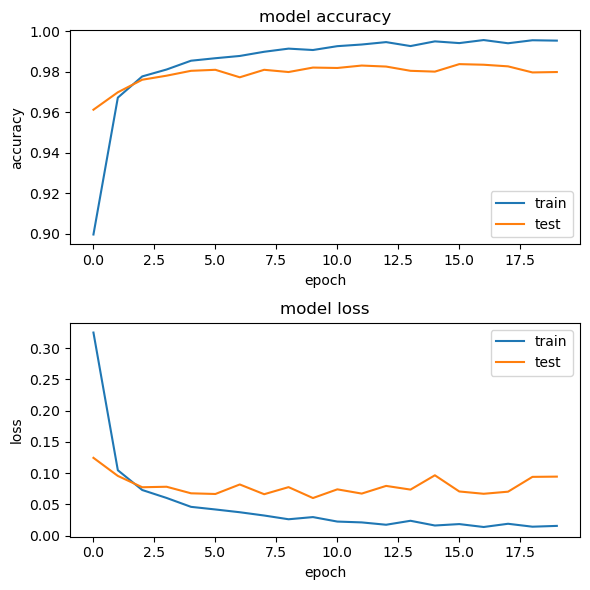

In [36]:
fig = plt.figure(figsize=(6,6))
plt.subplot(2,1,1)
plt.plot(history6.history['accuracy'])
plt.plot(history6.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [37]:
mnist_model = load_model(model_path)
loss_and_metrics6 = mnist_model.evaluate(X_test, Y_test, verbose=2)


313/313 - 2s - loss: 0.0945 - accuracy: 0.9798 - 2s/epoch - 8ms/step


In [38]:
model = Sequential()
model.add(Dense(1024, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.4))

model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(10))
model.add(Activation('softmax'))

In [39]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [40]:
start = time.time()
print("time_start")
history7 = model.fit(X_train, Y_train,
          batch_size=512, epochs=40,
          verbose=2,
          validation_data=(X_test, Y_test))
end = time.time()
time7=end - start
# saving the model
save_dir = 'results'
model_name = 'allin_keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

time_start
Epoch 1/40
118/118 - 28s - loss: 0.4084 - accuracy: 0.8713 - val_loss: 0.1232 - val_accuracy: 0.9629 - 28s/epoch - 233ms/step
Epoch 2/40
118/118 - 23s - loss: 0.1443 - accuracy: 0.9570 - val_loss: 0.0858 - val_accuracy: 0.9733 - 23s/epoch - 193ms/step
Epoch 3/40
118/118 - 22s - loss: 0.1090 - accuracy: 0.9670 - val_loss: 0.0765 - val_accuracy: 0.9773 - 22s/epoch - 184ms/step
Epoch 4/40
118/118 - 22s - loss: 0.0876 - accuracy: 0.9732 - val_loss: 0.0849 - val_accuracy: 0.9741 - 22s/epoch - 185ms/step
Epoch 5/40
118/118 - 22s - loss: 0.0753 - accuracy: 0.9768 - val_loss: 0.0703 - val_accuracy: 0.9805 - 22s/epoch - 183ms/step
Epoch 6/40
118/118 - 22s - loss: 0.0669 - accuracy: 0.9792 - val_loss: 0.0669 - val_accuracy: 0.9818 - 22s/epoch - 184ms/step
Epoch 7/40
118/118 - 21s - loss: 0.0608 - accuracy: 0.9810 - val_loss: 0.0702 - val_accuracy: 0.9802 - 21s/epoch - 182ms/step
Epoch 8/40
118/118 - 22s - loss: 0.0553 - accuracy: 0.9834 - val_loss: 0.0662 - val_accuracy: 0.9812 - 22s/

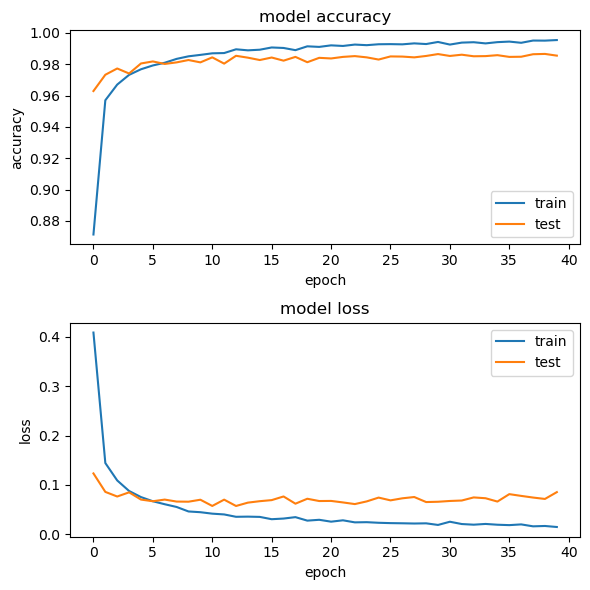

In [41]:
fig = plt.figure(figsize=(6,6))
plt.subplot(2,1,1)
plt.plot(history7.history['accuracy'])
plt.plot(history7.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history7.history['loss'])
plt.plot(history7.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [42]:
mnist_model = load_model(model_path)
loss_and_metrics7 = mnist_model.evaluate(X_test, Y_test, verbose=2)


313/313 - 3s - loss: 0.0853 - accuracy: 0.9855 - 3s/epoch - 8ms/step


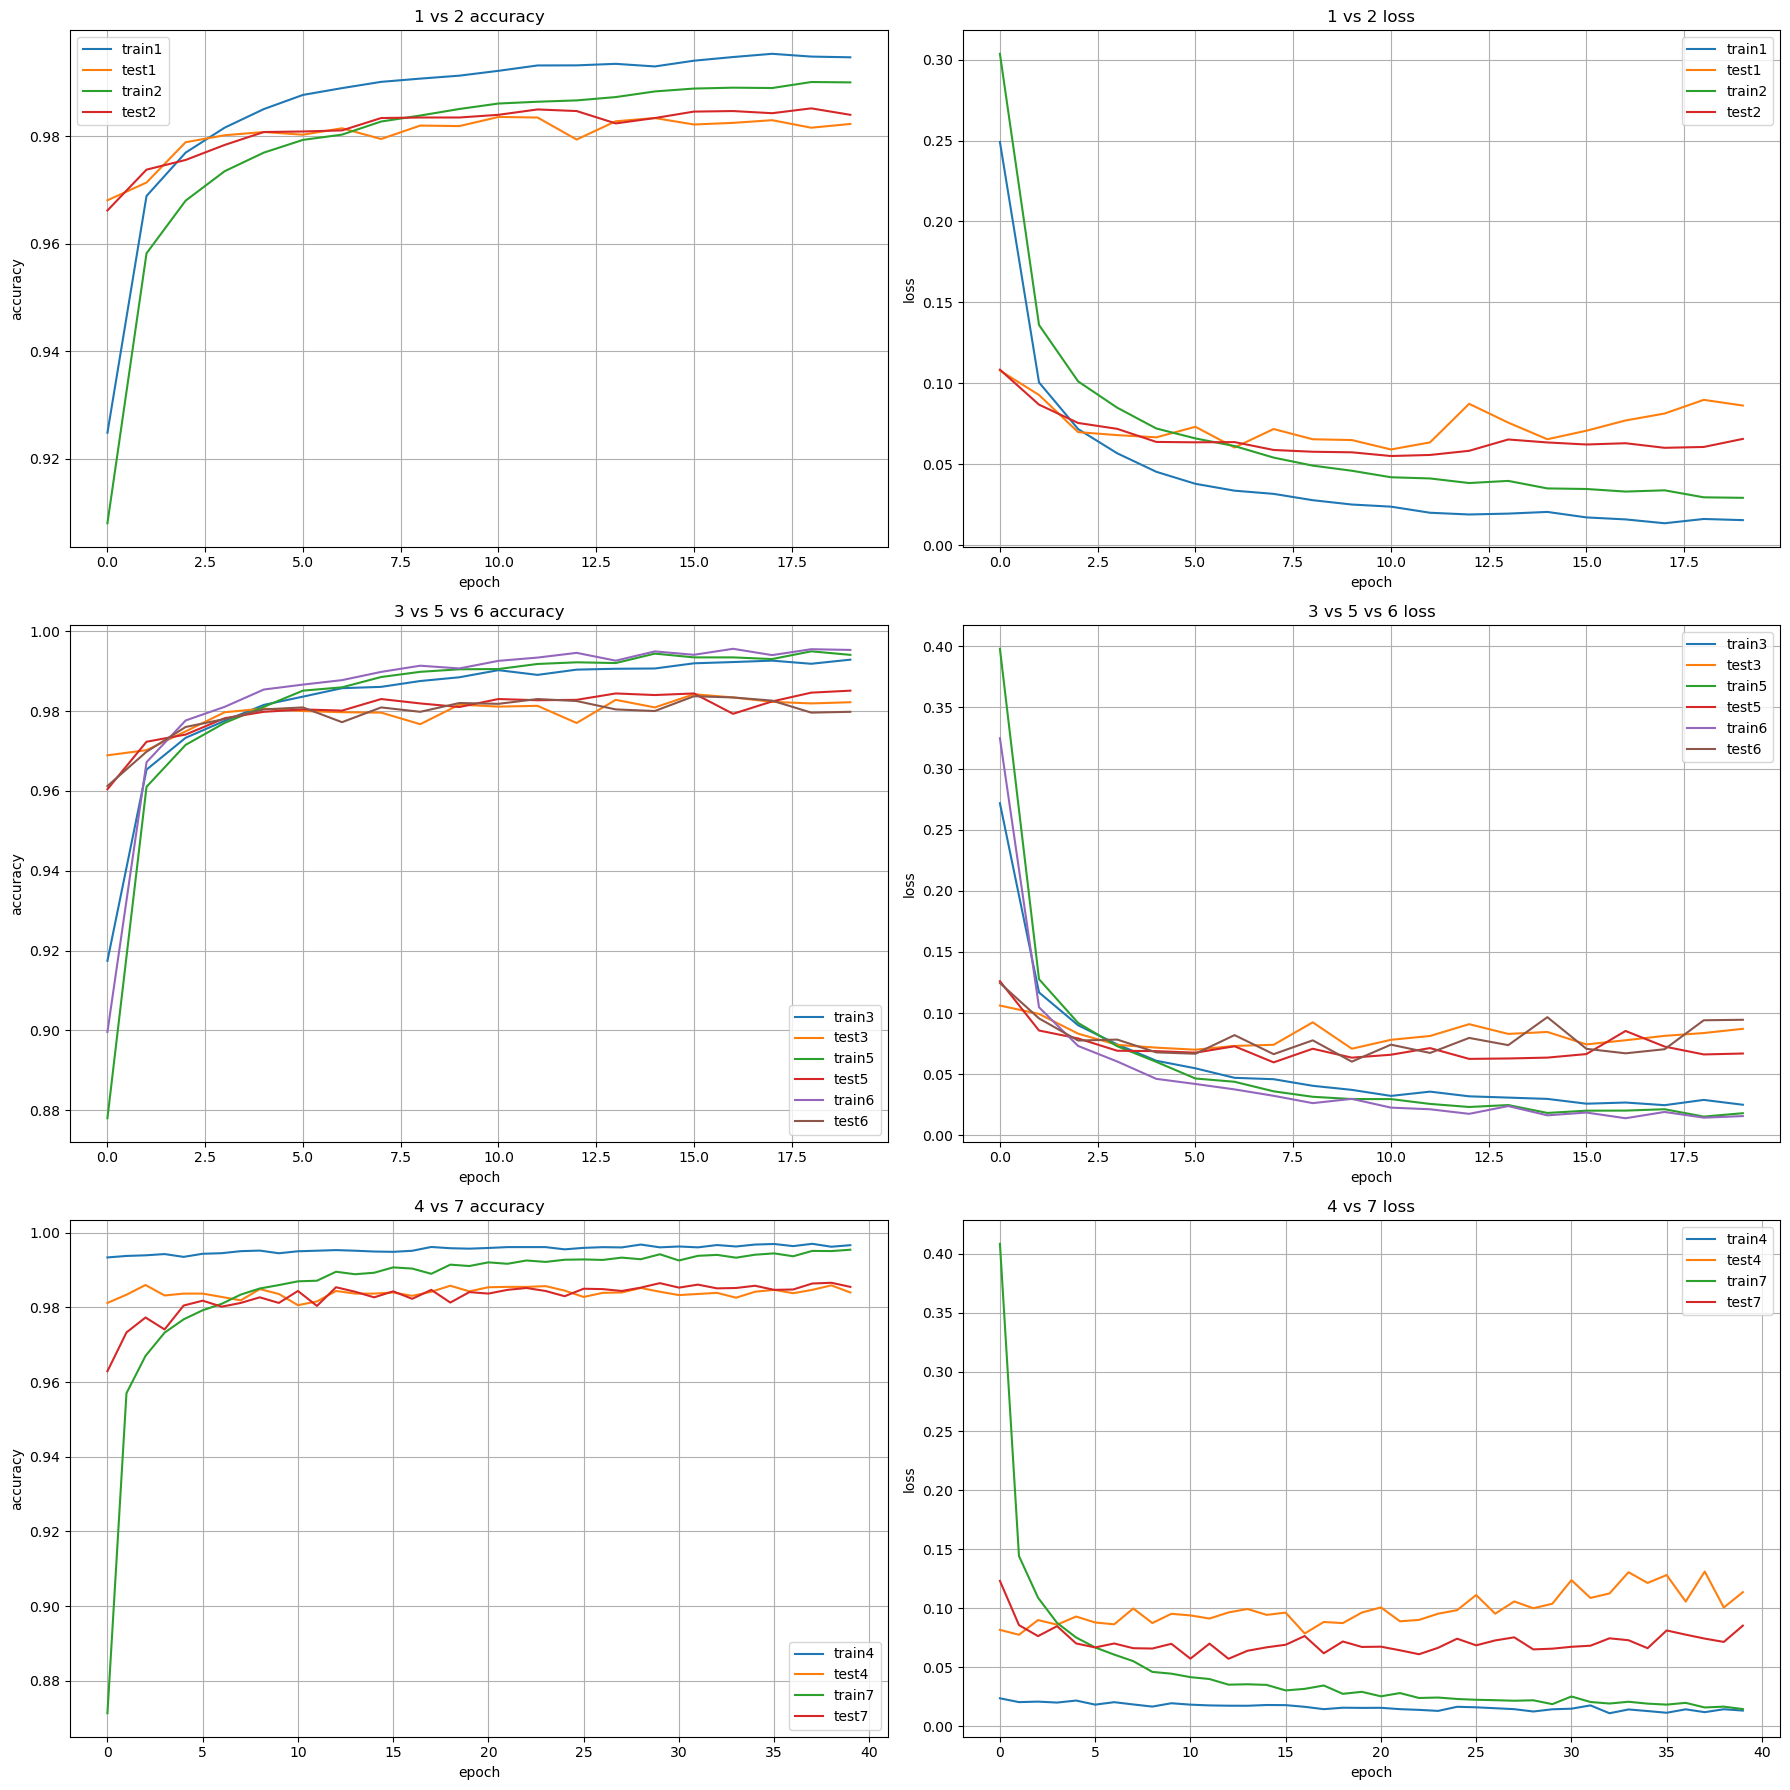

In [48]:
plt.figure(figsize=(18,18))
plt.subplot(3,2,1)
plt.plot(history1.history['accuracy'],label='train1')
plt.plot(history1.history['val_accuracy'],label='test1')
plt.plot(history2.history['accuracy'],label='train2')
plt.plot(history2.history['val_accuracy'],label='test2')
plt.title('1 vs 2 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.grid()

plt.subplot(3,2,3)
plt.plot(history3.history['accuracy'],label='train3')
plt.plot(history3.history['val_accuracy'],label='test3')
plt.plot(history5.history['accuracy'],label='train5')
plt.plot(history5.history['val_accuracy'],label='test5')
plt.plot(history6.history['accuracy'],label='train6')
plt.plot(history6.history['val_accuracy'],label='test6')
plt.title('3 vs 5 vs 6 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.grid()



plt.subplot(3,2,5)
plt.plot(history4.history['accuracy'],label='train4')
plt.plot(history4.history['val_accuracy'],label='test4')
plt.plot(history7.history['accuracy'],label='train7')
plt.plot(history7.history['val_accuracy'],label='test7')
plt.title('4 vs 7 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.grid()


plt.subplot(3,2,2)
plt.plot(history1.history['loss'],label='train1')
plt.plot(history1.history['val_loss'],label='test1')
plt.plot(history2.history['loss'],label='train2')
plt.plot(history2.history['val_loss'],label='test2')
plt.title('1 vs 2 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.grid()

plt.subplot(3,2,4)
plt.plot(history3.history['loss'],label='train3')
plt.plot(history3.history['val_loss'],label='test3')
plt.plot(history5.history['loss'],label='train5')
plt.plot(history5.history['val_loss'],label='test5')
plt.plot(history6.history['loss'],label='train6')
plt.plot(history6.history['val_loss'],label='test6')
plt.title('3 vs 5 vs 6 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.grid()

plt.subplot(3,2,6)
plt.plot(history4.history['loss'],label='train4')
plt.plot(history4.history['val_loss'],label='test4')
plt.plot(history7.history['loss'],label='train7')
plt.plot(history7.history['val_loss'],label='test7')
plt.title('4 vs 7 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.grid()


plt.tight_layout()

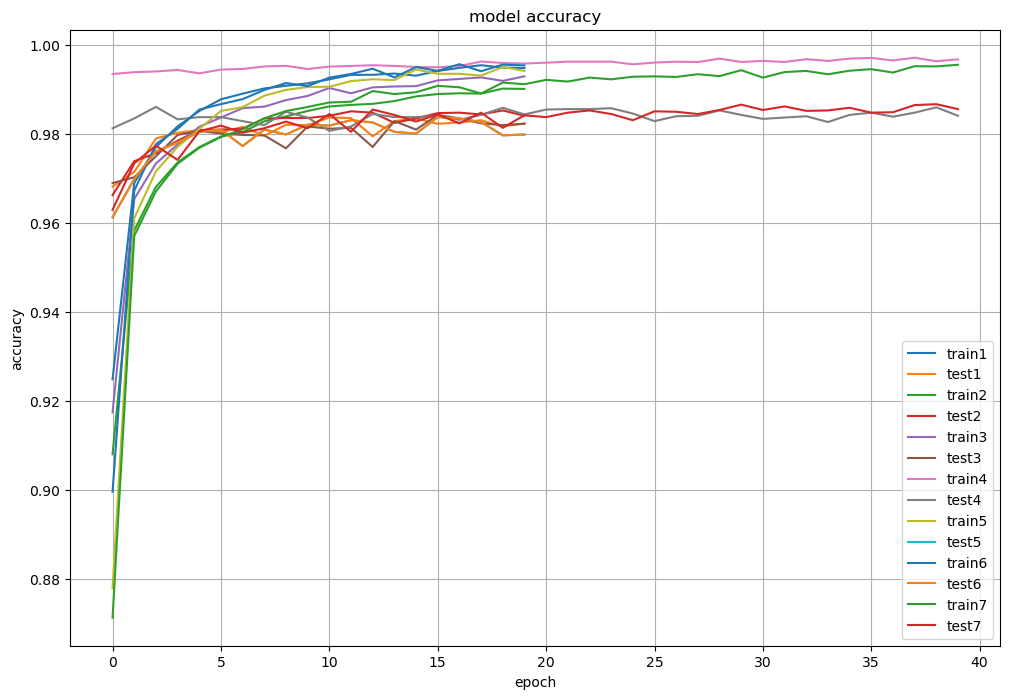

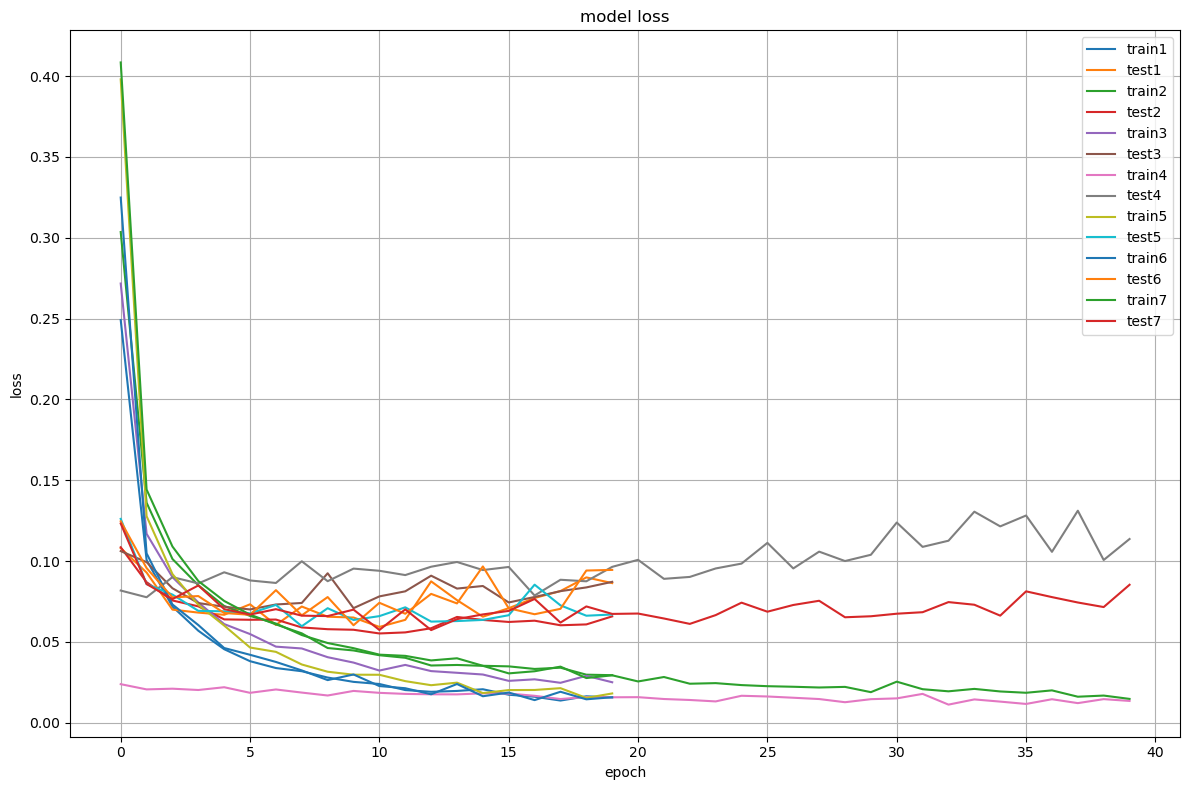

In [44]:
plt.figure(figsize=(12,8))
#plt.subplot(2,1,1)
plt.plot(history1.history['accuracy'],label='train1')
plt.plot(history1.history['val_accuracy'],label='test1')
plt.plot(history2.history['accuracy'],label='train2')
plt.plot(history2.history['val_accuracy'],label='test2')
plt.plot(history3.history['accuracy'],label='train3')
plt.plot(history3.history['val_accuracy'],label='test3')
plt.plot(history4.history['accuracy'],label='train4')
plt.plot(history4.history['val_accuracy'],label='test4')
plt.plot(history5.history['accuracy'],label='train5')
plt.plot(history6.history['val_accuracy'],label='test5')
plt.plot(history6.history['accuracy'],label='train6')
plt.plot(history6.history['val_accuracy'],label='test6')
plt.plot(history7.history['accuracy'],label='train7')
plt.plot(history7.history['val_accuracy'],label='test7')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.grid()
plt.show()
plt.figure(figsize=(12,8))
#plt.subplot(2,1,2)
plt.plot(history1.history['loss'],label='train1')
plt.plot(history1.history['val_loss'],label='test1')
plt.plot(history2.history['loss'],label='train2')
plt.plot(history2.history['val_loss'],label='test2')
plt.plot(history3.history['loss'],label='train3')
plt.plot(history3.history['val_loss'],label='test3')
plt.plot(history4.history['loss'],label='train4')
plt.plot(history4.history['val_loss'],label='test4')
plt.plot(history5.history['loss'],label='train5')
plt.plot(history5.history['val_loss'],label='test5')
plt.plot(history6.history['loss'],label='train6')
plt.plot(history6.history['val_loss'],label='test6')
plt.plot(history7.history['loss'],label='train7')
plt.plot(history7.history['val_loss'],label='test7')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.grid()
plt.tight_layout()

In [46]:
end_main = time.time()
maintime=end_main-start_main
print("Full runtime:",round(maintime,2))
print("Base: Dropout: 0.2   Layers:3   Epoch:20   Batch:128    Neuron:512")
print("      Test Loss", loss_and_metrics1[0])
print("      Test Accuracy", loss_and_metrics1[1])
print("      Runtime: ",round(time1,2), "sec")
print("Dropout: 0.4")
print("      Test Loss", loss_and_metrics2[0])
print("      Test Accuracy", loss_and_metrics2[1])
print("      Runtime: ",round(time2,2), "sec")
print("Two more layers")
print("      Test Loss", loss_and_metrics3[0])
print("      Test Accuracy", loss_and_metrics3[1])
print("      Runtime: ",round(time3,2), "sec")
print("Epoch 40:")
print("      Test Loss", loss_and_metrics4[0])
print("      Test Accuracy", loss_and_metrics4[1])
print("      Runtime: ",round(time4,2), "sec")
print("Batch size 512:")
print("      Test Loss", loss_and_metrics5[0])
print("      Test Accuracy", loss_and_metrics5[1])
print("      Runtime: ",round(time5,2), "sec")
print("1024 neuron:")
print("      Test Loss", loss_and_metrics6[0])
print("      Test Accuracy", loss_and_metrics6[1])
print("      Runtime: ",round(time6,2), "sec")
print("Allin:")
print("      Test Loss", loss_and_metrics7[0])
print("      Test Accuracy", loss_and_metrics7[1])
print("      Runtime: ",round(time7,2), "sec")


Full runtime: 2811.1
Base: Dropout: 0.2
      Test Loss 0.08637358993291855
      Test Accuracy 0.9822999835014343
      Runtime:  160.9 sec
Dropout: 0.4
      Test Loss 0.0657864511013031
      Test Accuracy 0.984000027179718
      Runtime:  159.54 sec
Two more layers
      Test Loss 0.08715342730283737
      Test Accuracy 0.982200026512146
      Runtime:  329.45 sec
Epoch 40:
      Test Loss 0.1136498674750328
      Test Accuracy 0.984000027179718
      Runtime:  576.12 sec
Batch size 512:
      Test Loss 0.06694113463163376
      Test Accuracy 0.9850999712944031
      Runtime:  156.27 sec
1024 neuron:
      Test Loss 0.09453245997428894
      Test Accuracy 0.9797999858856201
      Runtime:  463.22 sec
Allin:
      Test Loss 0.08533889800310135
      Test Accuracy 0.9854999780654907
      Runtime:  889.19 sec


**Kiértékelés**

A hasznos linkek között lévő oldal példa programját használtam a feladathoz. Az első lefutás paraméterein semmit se változtattam, ez vettem alapnak.
Elsőnek a dropout értékét növeltem meg a kétszeresére, 0.2-ről 0.4-re. Ez javított az eredményen mivel a dropout-al változtatjuk a neuron hálót így minden batch más hálón van tanítva. Ennek a háló változatosságnak köszönhetően növeltük a tanulási rátát.
A futási idő nem változott. 

Következőnek két további, ugyan olyan réteget adtam hozzá. A futási idő a kétszeresére nőtt, viszont mind a loss mind pedig a accuracy szinte változatlan. A dropout az alap, 0.2-re lett visszaállítva. Úgy néz ki ezzel a hálókonfigurációból többet nem tudok kihozni. 

A következő lépésként maradtam a korábbi rétegszámnál, és a tanulási ciklusokat kétszereztem (40) meg. Ez javított a pontosságon, viszont emelkedett a loss is jelentősen.
Persze jóval megnőtt a futási idő is.  

A batch méretet is változtattam, az előzőekhez képest. Vagyis 20db epoch, 5 réteg, 0.2 dropout.  Ez ugye az egyszerre beküldött halmaz ami ez esetben 4-szerese (512) az előzőeknek. Nagyban javította a pontosságot, míg a loss is jelentősen csökkent.  
Ez annak köszönhető, hogy egy cikluson belül ismételten növeltük a több adattal “változatosságot” az adatokban, így nőtt a tanulás. 

Az utolsó egy paraméteres változtatásban, a neuronok számát változtattam a kétszeresükre. Ez azt eredményezte, hogy a modell elkezdett túltanulni. Nem látványosan az ábrákon, de a loss is jelentősen nőtt, valamint a pontosság is csökkent. Ez a háló felesleges komplexitási miatt van így, mivel a rendszerben bekerülő zajokat képes felnagyítani, megtanulni. 

Végül minden változtatást amit végrehajtottam egyben is lefuttattam. A pontosságot tekintve nem meglepően itt sikerült elérni a legmagasabb értéket. Feltehetően jó hatással volt a megnövelt neuron számra a megnövelt dropout arány valamint az egyszerre beküldött adathalmaz növelése. Ez az ábrán is látszik, hogy a mind a kilengéseget, mind a túltanulást sikerült csökkenteni. Talán 20 cikluson is látszik, de 40- en még szembetűnőbb a különbség. 